In [22]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [23]:
 from sklearn.datasets import load_boston

In [24]:
data = load_boston()

In [25]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [26]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [27]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [29]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


<IPython.core.display.Javascript object>


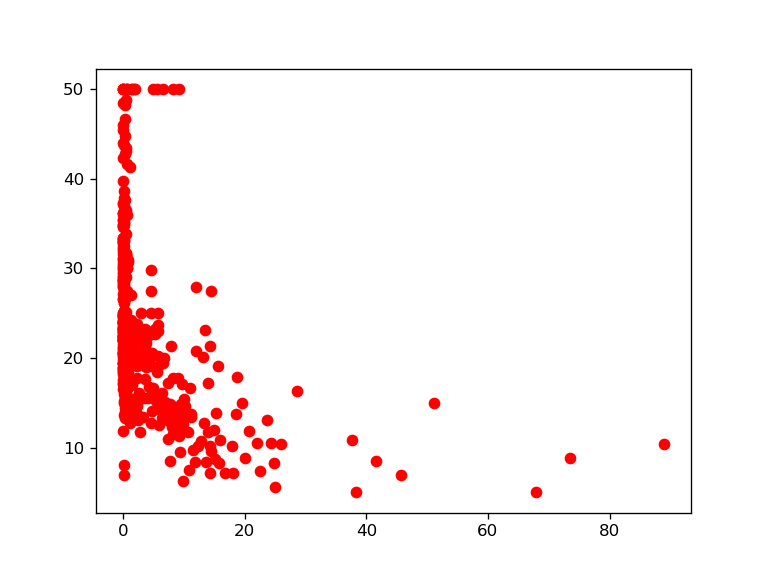

In [48]:
%matplotlib notebook
#the relation between the crime and the price
plt.scatter(df.CRIM, data.target , c='r')
plt.show()

<IPython.core.display.Javascript object>


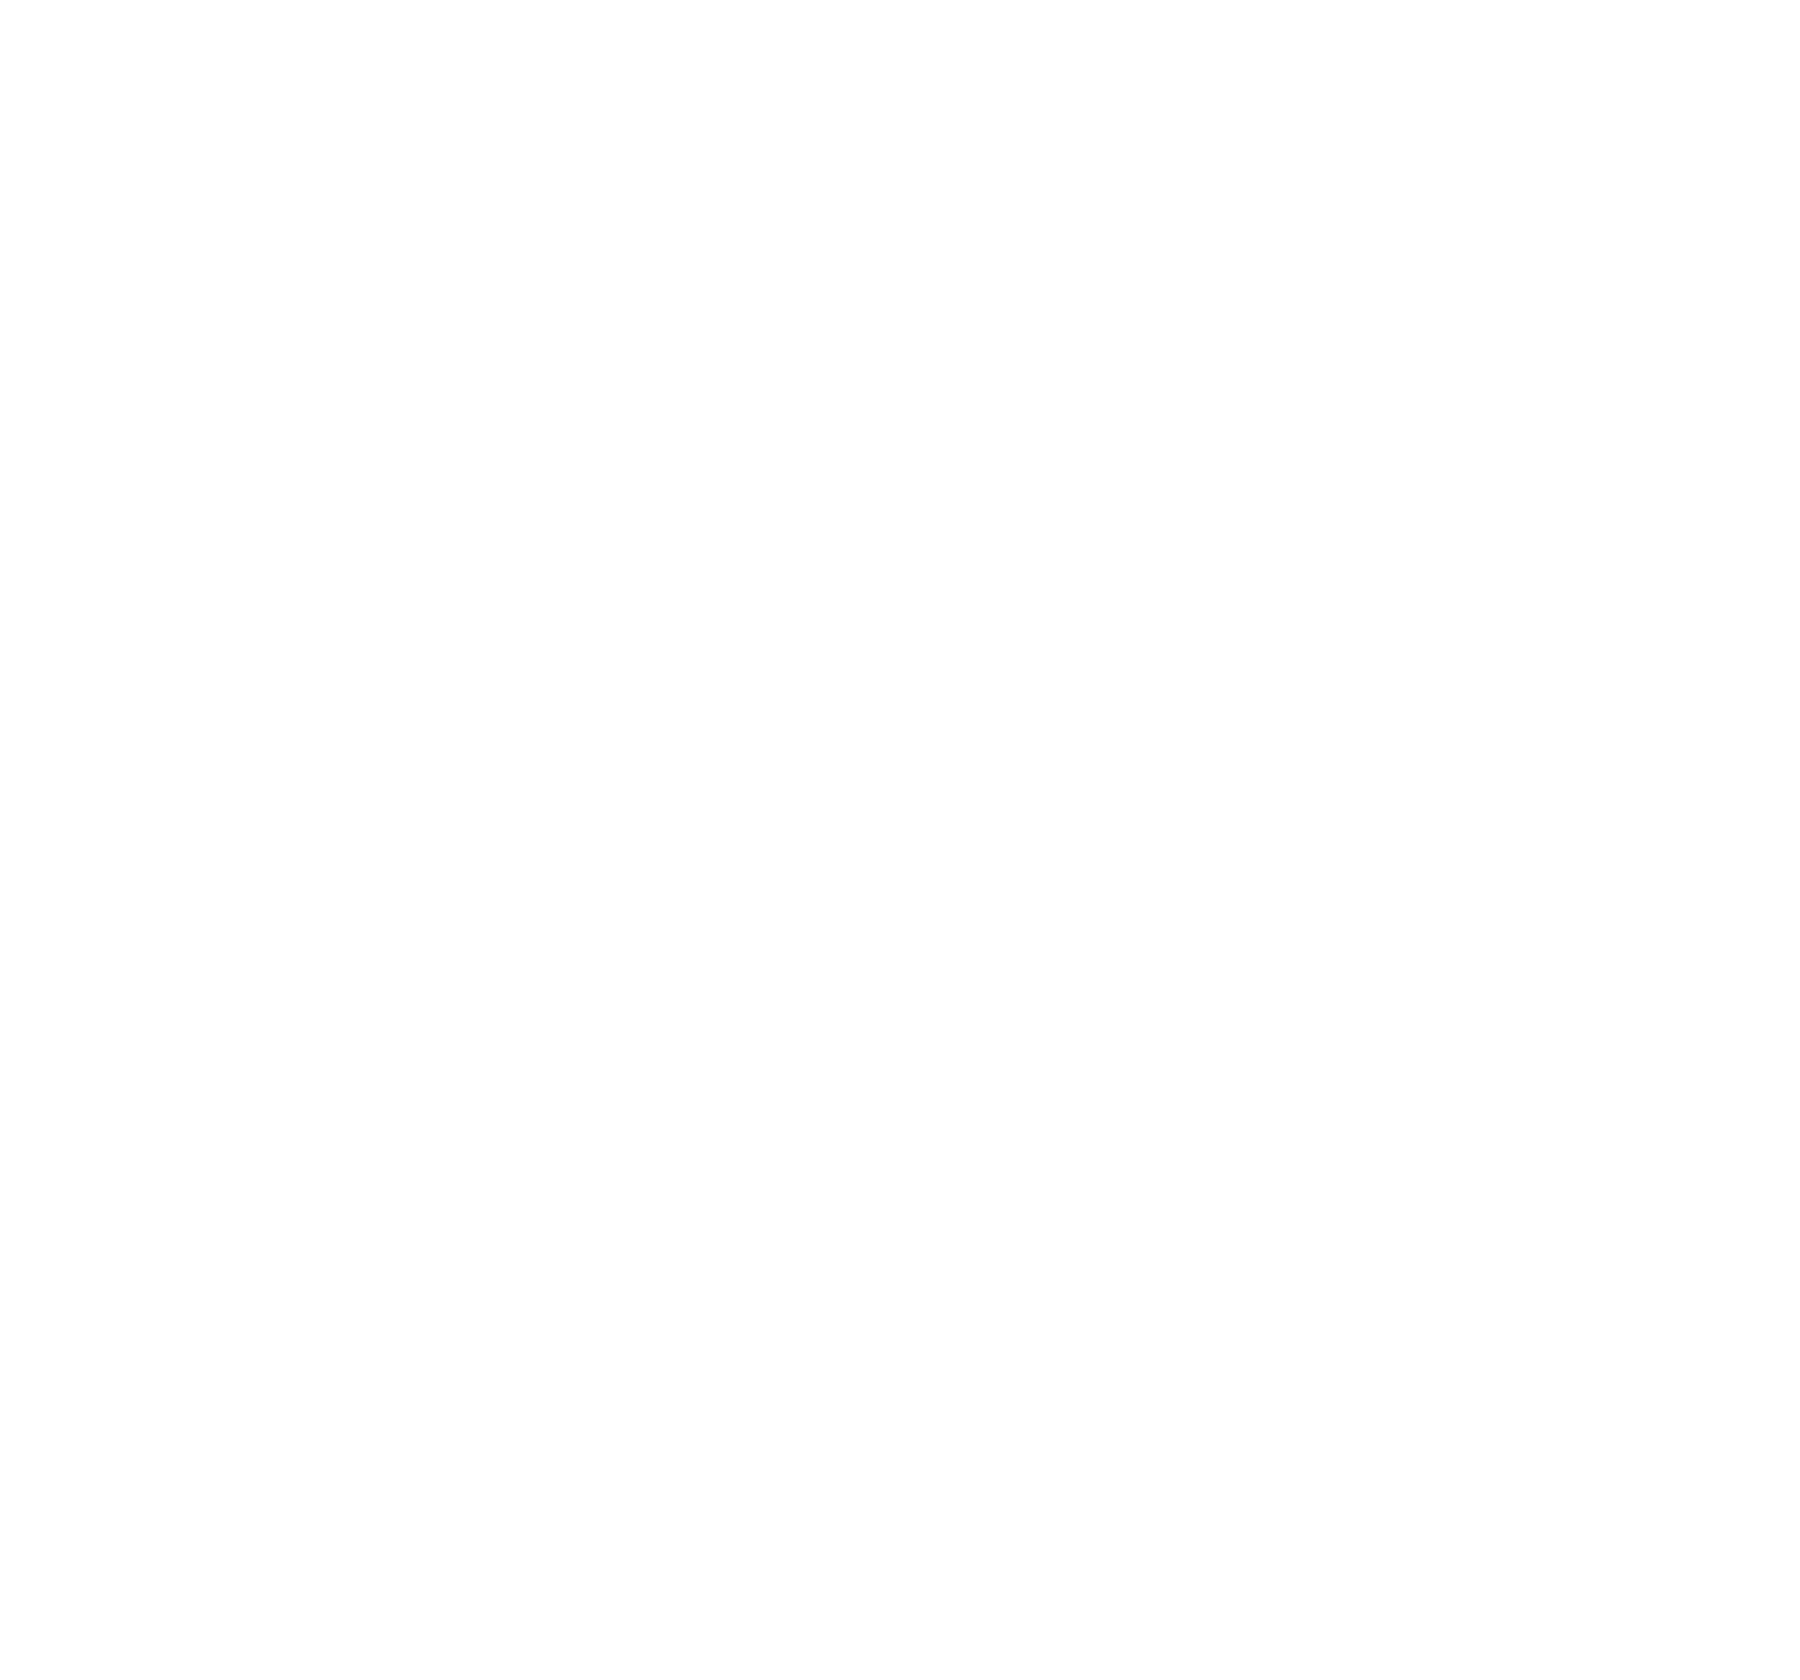

<IPython.core.display.Javascript object>


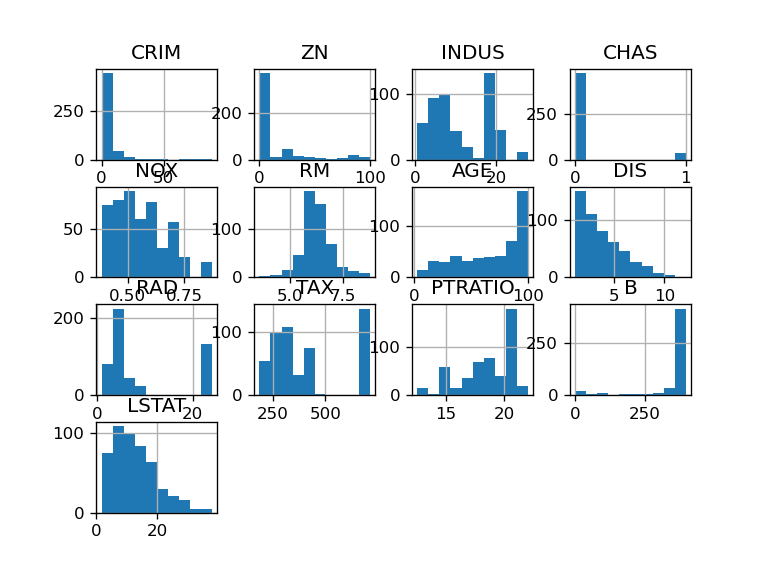

In [47]:
%matplotlib notebook
plt.figure(figsize=(15,14))
df.hist()
plt.show()

<IPython.core.display.Javascript object>


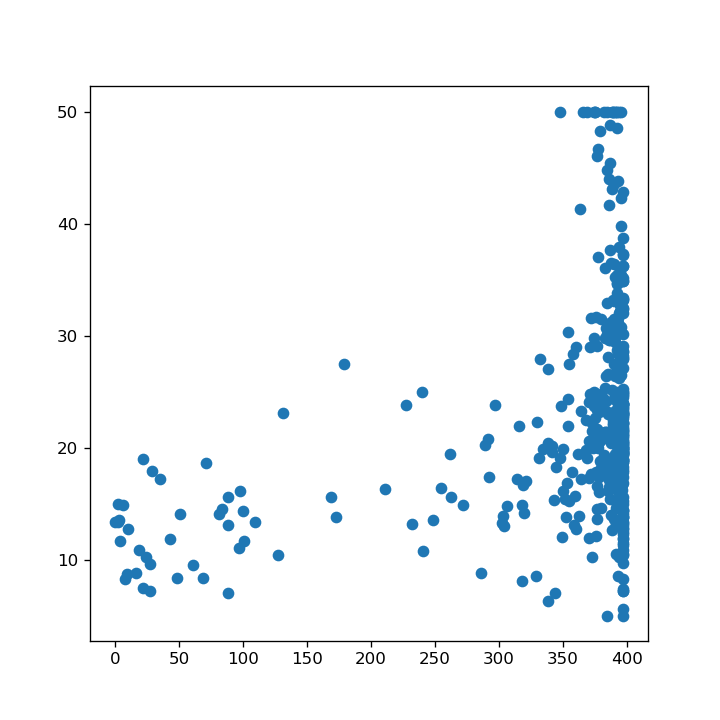

In [32]:
%matplotlib notebook
plt.figure(figsize=(6,6))
plt.scatter(df.B,data.target)
plt.show()

In [33]:
#train test split 
from sklearn.model_selection import train_test_split

In [34]:
x = df

In [35]:
y = data.target

In [36]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=.20,random_state=1)

In [37]:
import xgboost as xg 

In [38]:
model = xg.XGBRFRegressor()

In [39]:
model.fit(x_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=4,
               num_parallel_tree=100, objective='reg:squarederror',
               predictor='auto', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [42]:
print ('the score of trainning data is : ', model.score(x_train,y_train))

the score of trainning data is :  0.9656788222391653


In [46]:
print ('the score of testing  data is : ',model.score(x_test,y_test))

the score of testing  data is :  0.9055374886960708


In [63]:
input_data = ([0.00632 ,18.0 ,2.31 ,0.0 ,0.538 ,6.575 ,65.2 ,4.0900 ,1.0 ,296.0 ,15.3 ,396.90 ,4.98])
data = np.asarray(input_data)
data_reshaped= data.reshape(1,-1)
model.predict(data_reshaped)

array([26.516415], dtype=float32)